In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bitcoin_deep_learning.call_api import ApiCall
import numpy as np
import pandas as pd

/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Dataframe

In [3]:
df = ApiCall().read_local()

Data is up to date and has been loaded from local


In [10]:
df.tail(90)

,date,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,...,[//]_[AV]_Puell_Multiple,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price
1405,2021-12-07,873,107264.476348,18894487.50,962.50,999907,428,288189,39113906,89,...,1.183472,0.003890,25,6067778,2482202,665259,132647,13988,2063,50592.088498
1406,2021-12-08,872,107121.638677,18895537.50,1050.00,913412,324,265942,39169836,89,...,1.266034,0.001169,28,6072383,2480964,664597,132637,13981,2057,50521.236400
1407,2021-12-09,871,106978.436794,18896556.25,1018.75,1110528,407,282612,39093125,89,...,1.197164,0.001731,29,6038509,2472865,662664,132308,13928,2054,47911.076404
1408,2021-12-10,870,106821.020066,18897531.25,975.00,934193,376,271219,39190711,91,...,1.125487,0.001132,24,6052792,2473734,663302,132490,13923,2049,47262.237443
1409,2021-12-11,869,106751.573802,18898475.00,943.75,810054,347,225582,39244219,91,...,1.092895,0.000932,16,6062353,2477049,663817,132569,13943,2046,49354.087169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,2022-03-02,788,108525.031280,18972831.25,850.00,1097551,414,288521,40306927,86,...,0.866371,0.001539,52,6210211,2540216,673367,130233,13653,2173,43936.409710
1491,2022-03-03,787,108571.458445,18973756.25,925.00,1010962,406,268096,40305260,86,...,0.923652,0.001818,39,6212453,2541881,673980,130265,13665,2173,42459.603766
1492,2022-03-04,786,108513.039108,18974625.00,868.75,959692,497,261962,40317760,86,...,0.824277,0.000828,33,6215236,2543804,674297,130327,13678,2172,39146.884469
1493,2022-03-05,785,108708.531831,18975393.75,768.75,810397,439,225198,40364804,86,...,0.697401,0.000304,22,6220929,2546247,674715,130236,13668,2173,39416.462688


# Correlation plot

<AxesSubplot:>

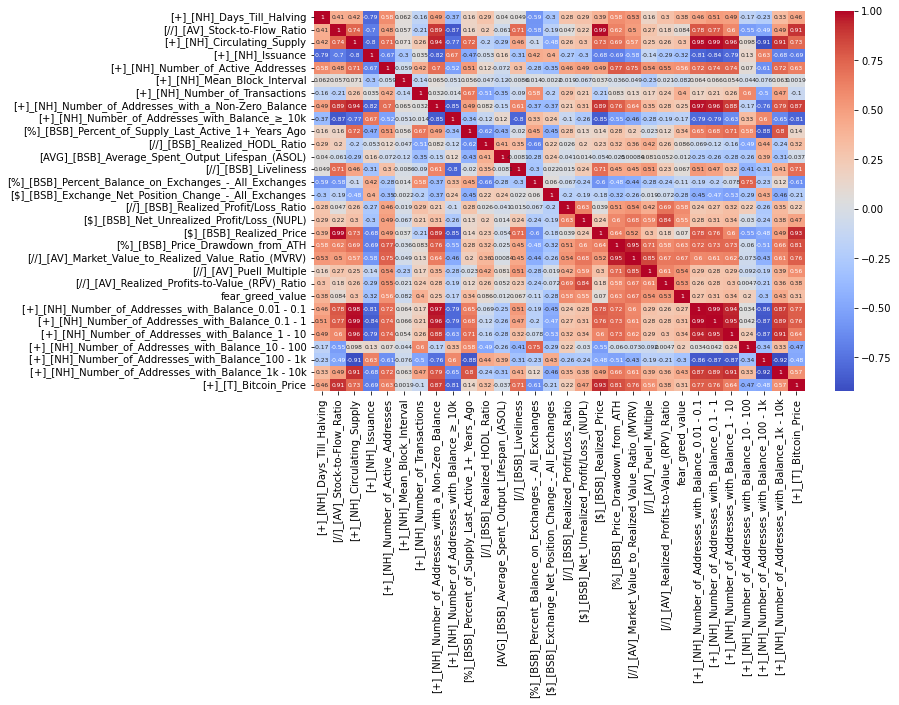

In [8]:
import seaborn as sns
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 6})

# VIF index

In [103]:
features = list(df.columns)[1:]

In [120]:
df_0 = df.drop("[+]_[T]_Bitcoin_Price", axis=1)

In [122]:
df_dateless =df.drop("date", axis=1)
    
df_scaled = (df_dateless - df_dateless.mean()) / df_dateless.std()

df_scaled.head()

,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,[%]_[BSB]_Percent_of_Supply_Last_Active_1+_Years_Ago,...,[//]_[AV]_Puell_Multiple,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price
0,0.249909,-0.698314,-1.962399,1.149528,0.128737,-0.626150,-0.402850,-0.410668,0.539124,-2.069325,...,1.215007,0.586816,-0.682716,-0.947695,-1.385132,-1.704938,-0.672855,2.220132,-1.782063,-0.576259
1,0.247481,-0.698344,-1.959086,1.351358,0.191842,-0.497808,-0.791136,-0.422121,0.539124,-2.075219,...,1.032459,0.203071,-1.345310,-0.983996,-1.450835,-1.732923,-0.707399,2.275452,-1.817598,-0.588103
2,0.245052,-0.698361,-1.955971,1.099070,-0.551248,-0.513850,-1.523246,-0.433227,0.539124,-2.069605,...,0.964544,0.004309,-0.240986,-1.016370,-1.492489,-1.755704,-0.773066,2.270842,-1.808714,-0.565544
3,0.242624,-0.698580,-1.952461,1.603645,-0.517985,-1.075346,-1.902072,-0.454899,0.539124,-2.108621,...,1.240997,1.088496,-0.947754,-1.106494,-1.559255,-1.793942,-0.777171,2.298503,-1.768738,-0.622419
4,0.240195,-0.698729,-1.948812,1.780247,0.452598,-1.251816,-1.140475,-0.485795,0.625566,-2.130752,...,0.945790,0.643677,-1.522002,-1.193588,-1.579211,-1.786683,-0.784695,2.272379,-1.826481,-0.693212


In [123]:
np.array(df_scaled.drop(columns=["[+]_[T]_Bitcoin_Price"]), dtype=float)

array([[ 0.24990917, -0.69831389, -1.96239934, ..., -0.6728547 ,
         2.22013226, -1.7820633 ],
       [ 0.24748066, -0.69834389, -1.95908643, ..., -0.70739863,
         2.27545248, -1.81759755],
       [ 0.24505215, -0.6983608 , -1.95597072, ..., -0.77306629,
         2.27084246, -1.80871399],
       ...,
       [ 0.14305471,  1.85753989,  1.40560562, ..., -1.35244661,
        -1.00841703,  1.07400183],
       [ 0.1406262 ,  1.862397  ,  1.40681838, ..., -1.38357034,
        -1.02378376,  1.07844361],
       [ 0.13819769,  1.86642805,  1.40811002, ..., -1.32337499,
        -1.03607714,  1.06956005]])

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# compute VIF factor for feature index 0
vif(np.array(df_scaled.drop(columns=["[+]_[T]_Bitcoin_Price"]), dtype=float), 3)

31.65404503094322

In [133]:
df_2 = pd.DataFrame()

df_2["features"] = list(df.columns)[1:-1]

df_2["vif_index"] = [vif(np.array(df_scaled.drop(columns=["[+]_[T]_Bitcoin_Price"]), dtype=float), i) for i in range(df_scaled.drop(columns=["[+]_[T]_Bitcoin_Price"]).shape[1])]

vif_df_2 = round(df_2.sort_values(by="vif_index", ascending = False),2)

vif_df_2

,features,vif_index
2,[+]_[NH]_Circulating_Supply,489.67
7,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_B...,296.30
23,[+]_[NH]_Number_of_Addresses_with_Balance_0.01...,252.43
24,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,249.66
1,[//]_[AV]_Stock-to-Flow_Ratio,130.54
19,[//]_[AV]_Market_Value_to_Realized_Value_Ratio...,100.59
17,[$]_[BSB]_Realized_Price,89.88
25,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,77.53
18,[%]_[BSB]_Price_Drawdown_from_ATH,63.08
28,[+]_[NH]_Number_of_Addresses_with_Balance_1k -...,44.61


# Lasso

In [94]:
X = df_scaled.drop(columns=["date", "[+]_[T]_Bitcoin_Price"])
y = df_scaled["[+]_[T]_Bitcoin_Price"]

In [95]:
y

0      -0.576259
1      -0.588103
2      -0.565544
3      -0.622419
4      -0.693212
          ...   
1490    1.348388
1491    1.266998
1492    1.084427
1493    1.099284
1494    1.044566
Name: [+]_[T]_Bitcoin_Price, Length: 1495, dtype: float64

In [134]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

linreg = LinearRegression().fit(X, y)
ridge = Ridge(alpha=0.2).fit(X, y)
lasso = Lasso(alpha=0.2).fit(X, y)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: x)\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_linreg,coef_ridge,coef_lasso
[+]_[NH]_Days_Till_Halving,-0.049705,-0.050989,0.000000
[//]_[AV]_Stock-to-Flow_Ratio,-0.155082,-0.148895,0.000000
[+]_[NH]_Circulating_Supply,0.152183,0.148012,0.000000
[+]_[NH]_Issuance,-0.051013,-0.052285,-0.000000
[+]_[NH]_Number_of_Active_Addresses,0.021129,0.020905,0.000000
[+]_[NH]_Mean_Block_Interval,-0.000804,-0.001047,-0.000000
[+]_[NH]_Number_of_Transactions,0.012672,0.013431,-0.000000
[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,-0.195519,-0.198158,0.000000
[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k,-0.116413,-0.119219,-0.000000
[%]_[BSB]_Percent_of_Supply_Last_Active_1+_Years_Ago,-0.021636,-0.021958,0.000000


In [135]:
import statsmodels.api as sm
ols = sm.OLS(y, sm.add_constant(X)).fit()
ols.summary()

/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     [+]_[T]_Bitcoin_Price   R-squared:                       0.989
Model:                               OLS   Adj. R-squared:                  0.989
Method:                    Least Squares   F-statistic:                     4520.
Date:                   Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                           15:23:53   Log-Likelihood:                 1246.7
No. Observations:                   1495   AIC:                            -2433.
Df Residuals:                       1465   BIC:                            -2274.
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -2.467e-15      0.003  -8.98e-13      1.000      -0.005       0.005
[+]_[NH]_Days_Till_Halving                                -0.0497      0.010     -4.837      0.000      -0.070      -0.030
[//]_[AV]_Stock-to-Flow_Ratio                             -0.1551      0.031     -4.942      0.000      -0.217      -0.094
[+]_[NH]_Circulating_Supply                                0.1522      0.061      2.504      0.012       0.033       0.271
[+]_[NH]_Issuance                                         -0.0510      0.015     -3.301      0.001      -0.081      -0.021
[+]_[NH]_Number_of_Active_Addresses                        0.0211      0.009      2.381      0.017       0.004       0.039
[+]_[NH]_Mean_Block_Interval                              -0.0008      0.004     -0.195      0.845      -0.009       0.007
[+]_[NH]_Number_of_Transactions                            0.0127      0.008      1.541      0.124      -0.003       0.029
[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance      -0.1955      0.047     -4.135      0.000      -0.288      -0.103
[+]_[NH]_Number_of_Addresses_with_Balance_≥_10k           -0.1164      0.014     -8.532      0.000      -0.143      -0.090
[%]_[BSB]_Percent_of_Supply_Last_Active_1+_Years_Ago      -0.0216      0.017     -1.270      0.204      -0.055       0.012
[//]_[BSB]_Realized_HODL_Ratio                             0.0928      0.008     11.389      0.000       0.077       0.109
[AVG]_[BSB]_Average_Spent_Output_Lifespan_(ASOL)          -0.0067      0.004     -1.878      0.061      -0.014       0.000
[//]_[BSB]_Liveliness                                     -0.0627      0.011     -5.483      0.000      -0.085      -0.040
[%]_[BSB]_Percent_Balance_on_Exchanges_-_All_Exchanges     0.1921      0.018     10.712      0.000       0.157       0.227
[$]_[BSB]_Exchange_Net_Position_Change_-_All_Exchanges    -0.0397      0.005     -7.702      0.000      -0.050      -0.030
[//]_[BSB]_Realized_Profit/Loss_Ratio                     -0.0140      0.005     -3.073      0.002      -0.023      -0.005
[$]_[BSB]_Net_Unrealized_Profit/Loss_(NUPL)                0.0951      0.006     15.292      0.000       0.083       0.107
[$]_[BSB]_Realized_Price                                   0.9145      0.026     35.119      0.000       0.863       0.966
[%]_[BSB]_Price_Drawdown_from_ATH                          0.0933      0.022      4.277      0.000       0.051       0.136
[//]_[AV]_Market_Value_to_Realized_Value_Ratio_(MVRV)      0.3318      0.028     12.045      0.000       0.278       0.386
[//]_[AV]_Puell_Multiple                                   0.0408      0.017      2.377      0.018